# GLobal Markets Yearly Volatility
## By Ori Rosenthal

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import urllib as u
from pandas_datareader import data as web
from datetime import datetime 
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
plt.style.use('bmh')

In [2]:
start = datetime(2010, 1, 1)
end = pd.datetime.now()

m_list=['SPY','^GDAXI','^FCHI','^N225','^BSESN','^BVSP','^SSE50','TA35.TA','^AXJO','^GSPTSE']

    
stuff = []
for stock in m_list:
    sdata = web.get_data_yahoo(stock, start=start, end=end)[['Adj Close']]
    stuff.append(sdata['Adj Close'])

combo = pd.concat(stuff, axis = 1)

In [3]:
# 10 major global markets (9+ Israel:))
combo.columns=['S&P500','DAX','CAC40','Nikkei 225','BSE Sensex','Bovespa',
               'Shanghai SSE 50','Tel-Aviv35','Australian ASX200','S&P/TSX Canada' ]
combo.dropna(inplace=True)
combo_returns = np.log(combo/combo.shift())
combo_returns.dropna(inplace=True)
combo_returns.head()

,S&P500,DAX,CAC40,Nikkei 225,BSE Sensex,Bovespa,Shanghai SSE 50,Tel-Aviv35,Australian ASX200,S&P/TSX Canada
Date,,,,,,,,,,
2013-05-07,0.017683,0.027266,0.016082,0.034889,0.007732,0.017080,0.030653,0.005093,0.002667,0.006803
2013-05-08,0.004541,0.008268,0.008876,0.007409,0.005077,-0.008387,0.003542,-0.001132,0.010847,0.009653
2013-05-09,-0.002820,0.001555,-0.007026,-0.006617,-0.002562,-0.006418,-0.009096,-0.005074,-0.000269,-0.003271
2013-05-13,0.004044,0.002024,0.004222,0.040783,-0.012484,-0.018200,0.001581,0.001221,0.002287,-0.001149
2013-05-16,0.010946,0.010881,0.008549,0.017105,0.027827,0.005951,0.005908,0.009172,-0.008597,-0.001749


In [4]:
combo_volatility = np.round(combo_returns.rolling(window=252).std() * np.sqrt(252)*100,2)
combo_volatility.tail()

,S&P500,DAX,CAC40,Nikkei 225,BSE Sensex,Bovespa,Shanghai SSE 50,Tel-Aviv35,Australian ASX200,S&P/TSX Canada
Date,,,,,,,,,,
2018-12-20,17.53,17.44,16.44,21.00,15.28,26.77,23.74,12.72,12.99,11.47
2018-12-27,17.56,17.56,16.56,21.05,15.39,26.75,23.87,13.76,13.41,11.46
2019-01-07,17.73,17.91,16.77,21.05,15.36,27.59,23.93,14.06,13.45,11.70
2019-01-08,17.75,17.92,16.81,21.07,15.36,27.59,23.92,14.07,13.49,11.71
2019-01-09,17.76,17.92,16.82,21.09,15.37,27.61,23.89,14.06,13.47,11.78


In [5]:
combo_volatility_mean_100 = combo_volatility.rolling(100).mean()
combo_volatility_mean_100.dropna(inplace=True)
combo_volatility_mean_100.head()
combo_final = combo_volatility[combo_volatility.index>=combo_volatility_mean_100.index[0]]
combo_final.head()

,S&P500,DAX,CAC40,Nikkei 225,BSE Sensex,Bovespa,Shanghai SSE 50,Tel-Aviv35,Australian ASX200,S&P/TSX Canada
Date,,,,,,,,,,
2015-09-09,17.46,26.74,25.66,27.21,20.18,30.26,44.68,14.82,17.16,16.46
2015-09-10,17.45,26.75,25.70,27.33,20.18,30.24,44.68,14.83,17.33,16.44
2015-09-16,17.58,26.75,25.72,27.27,20.22,30.55,44.70,14.83,17.33,16.50
2015-09-24,17.87,27.95,26.56,27.44,20.22,31.23,44.76,15.42,17.34,16.80
2015-09-29,18.06,27.93,26.53,27.54,20.18,31.33,44.86,15.60,17.56,16.95


In [6]:
x = combo_final.iloc[-1].sort_values(ascending=False)
x.index

Index(['Bovespa', 'Shanghai SSE 50', 'Nikkei 225', 'DAX', 'S&P500', 'CAC40',
       'BSE Sensex', 'Tel-Aviv35', 'Australian ASX200', 'S&P/TSX Canada'],
      dtype='object')

In [7]:
x

Bovespa              27.61
Shanghai SSE 50      23.89
Nikkei 225           21.09
DAX                  17.92
S&P500               17.76
CAC40                16.82
BSE Sensex           15.37
Tel-Aviv35           14.06
Australian ASX200    13.47
S&P/TSX Canada       11.78
Name: 2019-01-09 00:00:00, dtype: float64

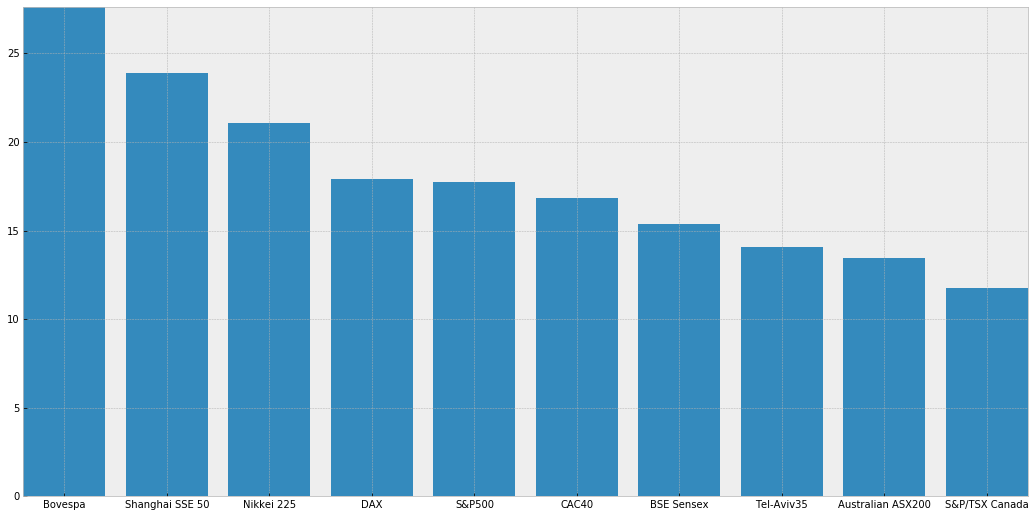

In [8]:
plt.style.use('bmh')
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(111)
ax.bar(x.index,x , lw=3);

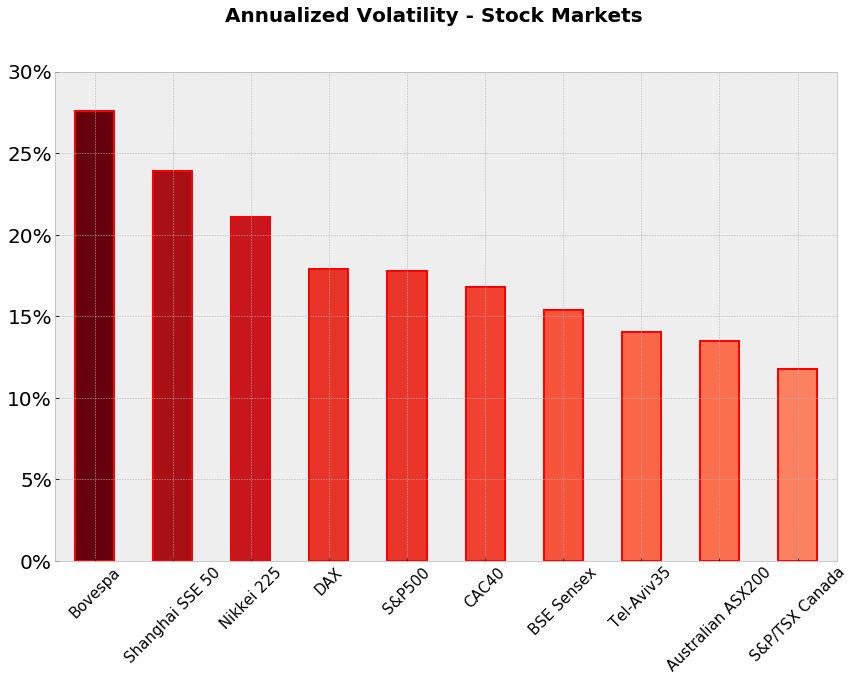

In [9]:
from matplotlib import cm
colors = cm.Reds(x / float(max(x)))

plt.style.use('bmh')
x.plot(kind='bar',color=colors, figsize=(14,9), ylim=(0,30),edgecolor='r',lw=2, fontsize=15);
plt.suptitle('Annualized Volatility - Stock Markets', fontsize=20,fontweight='bold');
plt.xticks(rotation=45, fontsize=15);
plt.yticks(color='k', fontsize=20);
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]);


## Last 100 days yearly volatility chart for each market

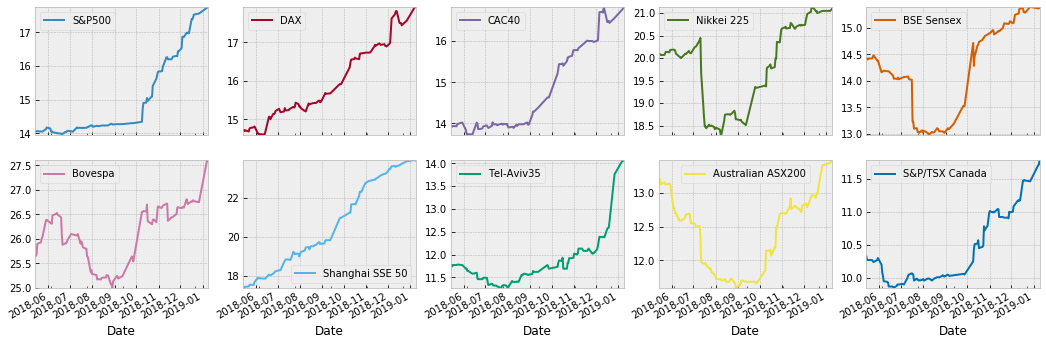

In [10]:
combo_final[-100:].plot(subplots=True, layout=(4,5),figsize=(18,12));